In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
crimeData = pd.read_csv("C:/Users/LENOVO/Desktop/VI SEM/Data and Web Minig/Project/Data set/dataset.csv")
print (crimeData.shape)
crimeData.head(5)


(91, 25)


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
0,1,87,0.035604,0.298270,0.527596,0.436170,6.71,0.001828,2.422633,30.993681,...,408.724487,221.270065,453.172211,274.177460,334.540008,477.579987,292.089996,311.910004,0.080169,0.077871
1,3,87,0.015253,0.132029,1.481480,0.450000,6.35,0.000746,1.046332,26.892078,...,376.254181,196.010101,258.564972,192.307693,300.380005,409.829987,362.959992,301.470001,0.030227,0.082607
2,5,87,0.012960,0.444444,0.267857,0.600000,6.76,0.001234,0.412766,34.816051,...,372.208435,229.320892,305.944061,209.697220,237.649994,358.980011,331.529999,281.369995,0.465116,0.072115
3,7,87,0.026753,0.364760,0.525424,0.435484,7.14,0.001530,0.491557,42.947586,...,397.690125,191.172012,281.065094,256.721435,281.799988,412.149994,328.269989,299.029999,0.273622,0.073537
4,9,87,0.010623,0.518219,0.476563,0.442623,8.22,0.000860,0.546948,28.054739,...,377.312561,206.821487,289.312470,215.193329,290.890015,377.350006,367.230011,342.820007,0.060086,0.070698


In [2]:
crimeData = crimeData[crimeData.county != 185] 
crimeData = crimeData[crimeData.county != 115] 
crimeData = crimeData[crimeData['prbarr'] < 1]
crimeData = crimeData[crimeData['prbconv'] < 1]
crimeData = crimeData[crimeData['west']+crimeData['central'] <= 1]                                                    
crimeData = crimeData.drop('year', axis=1)
print (crimeData.shape)

(80, 24)


In [3]:
import statsmodels.api as sm
y = crimeData['crmrte']
X = crimeData['density']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
density_pvalue = model.pvalues['density']                                                     
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     85.18
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           3.88e-14
Time:                        20:06:46   Log-Likelihood:                 234.23
No. Observations:                  80   AIC:                            -464.5
Df Residuals:                      78   BIC:                            -459.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0222      0.002     10.949      0.000       0.018       0.026
density        0.0088      0.001      9.229      0.000       0.007       0.011
==============================================================================
Omnibus:                       31.606   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.597
Skew:                           1.517   Prob(JB):                     3.11e-13
Kurtosis:                       5.841   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
y = crimeData['crmrte']
X = crimeData[['density', 'urban']]
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
density_pvalue_upd = model.pvalues['density']
print('Difference in P-Value = ' + str(density_pvalue_upd - density_pvalue))
model.summary()

Difference in P-Value = 2.2791391426354033e-05


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     42.12
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           4.38e-13
Time:                        20:06:50   Log-Likelihood:                 234.27
No. Observations:                  80   AIC:                            -462.5
Df Residuals:                      77   BIC:                            -455.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0226      0.002      9.170      0.000       0.018       0.027
density        0.0084      0.002      4.511      0.000       0.005       0.012
urban          0.0026      0.010      0.277      0.783      -0.016       0.022
==============================================================================
Omnibus:                       31.413   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.769
Skew:                           1.514   Prob(JB):                     4.71e-13
Kurtosis:                       5.804   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
y = crimeData['crmrte']
X = crimeData.drop('crmrte', axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     20.94
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           9.21e-20
Time:                        20:06:56   Log-Likelihood:                 295.18
No. Observations:                  80   AIC:                            -542.4
Df Residuals:                      56   BIC:                            -485.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.018      0.660      0.512      -0.024       0.048
county      2.584e-06   1.54e-05      0.168      0.867   -2.82e-05    3.33e-05
prbarr        -0.0522      0.010     -5.093      0.000      -0.073      -0.032
prbconv       -0.0073      0.006     -1.179      0.243      -0.020       0.005
prbpris        0.0110      0.012      0.890      0.377      -0.014       0.036
avgsen        -0.0008      0.000     -2.005      0.050      -0.002   -6.38e-07
polpc         10.7921      2.617      4.123      0.000       5.549      16.036
density        0.0049      0.001      3.523      0.001       0.002       0.008
taxpc          0.0002      0.000      1.918      0.060   -8.89e-06       0.000
west          -0.0051      0.004     -1.205      0.233      -0.014       0.003
central       -0.0063      0.003     -2.320      0.024      -0.012      -0.001
urban          0.0035      0.006      0.558      0.579      -0.009       0.016
pctmin80       0.0003   9.37e-05      2.877      0.006    8.19e-05       0.000
wcon        3.108e-05   2.67e-05      1.164      0.249   -2.24e-05    8.46e-05
wtuc        1.281e-05   1.52e-05      0.842      0.403   -1.77e-05    4.33e-05
wtrd        5.237e-05    4.2e-05      1.248      0.217   -3.17e-05       0.000
wfir       -4.966e-05    2.8e-05     -1.774      0.081      -0.000    6.41e-06
wser       -8.336e-05   3.05e-05     -2.729      0.008      -0.000   -2.22e-05
wmfg       -2.522e-06   1.35e-05     -0.186      0.853   -2.96e-05    2.46e-05
wfed        3.817e-05    2.5e-05      1.527      0.132   -1.19e-05    8.82e-05
wsta       -5.022e-05   2.42e-05     -2.074      0.043   -9.87e-05   -1.71e-06
wloc        4.453e-05   4.51e-05      0.987      0.328   -4.58e-05       0.000
mix           -0.0228      0.014     -1.632      0.108      -0.051       0.005
pctymle        0.1447      0.044      3.261      0.002       0.056       0.234
==============================================================================
Omnibus:                        6.753   Durbin-Watson:                   2.494
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.098
Skew:                           0.639   Prob(JB):                       0.0474
Kurtosis:                       3.443   Cond. No.                     3.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
y = crimeData['crmrte']
X = crimeData.drop(['crmrte', 'urban', 'county'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()                                               

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     23.60
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           4.53e-21
Time:                        20:07:06   Log-Likelihood:                 294.95
No. Observations:                  80   AIC:                            -545.9
Df Residuals:                      58   BIC:                            -493.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.017      0.568      0.572      -0.025       0.045
prbarr        -0.0524      0.010     -5.197      0.000      -0.073      -0.032
prbconv       -0.0076      0.006     -1.240      0.220      -0.020       0.005
prbpris        0.0104      0.012      0.862      0.392      -0.014       0.035
avgsen        -0.0008      0.000     -2.011      0.049      -0.002   -3.73e-06
polpc         10.6581      2.557      4.168      0.000       5.540      15.776
density        0.0055      0.001      6.517      0.000       0.004       0.007
taxpc          0.0002      0.000      2.012      0.049     1.1e-06       0.000
west          -0.0045      0.004     -1.108      0.272      -0.013       0.004
central       -0.0062      0.003     -2.343      0.023      -0.012      -0.001
pctmin80       0.0003   8.82e-05      3.231      0.002       0.000       0.000
wcon         3.12e-05   2.63e-05      1.186      0.240   -2.15e-05    8.39e-05
wtuc        1.339e-05   1.45e-05      0.924      0.359   -1.56e-05    4.24e-05
wtrd        5.361e-05    4.1e-05      1.308      0.196   -2.84e-05       0.000
wfir       -5.175e-05   2.73e-05     -1.899      0.063      -0.000    2.81e-06
wser       -8.318e-05   2.96e-05     -2.809      0.007      -0.000   -2.39e-05
wmfg       -1.573e-06   1.32e-05     -0.119      0.906    -2.8e-05    2.49e-05
wfed        3.676e-05   2.45e-05      1.500      0.139   -1.23e-05    8.58e-05
wsta       -4.646e-05   2.28e-05     -2.034      0.047   -9.22e-05   -7.44e-07
wloc        4.501e-05   4.44e-05      1.014      0.315   -4.39e-05       0.000
mix           -0.0223      0.014     -1.628      0.109      -0.050       0.005
pctymle        0.1439      0.043      3.330      0.002       0.057       0.230
==============================================================================
Omnibus:                        6.849   Durbin-Watson:                   2.503
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.210
Skew:                           0.646   Prob(JB):                       0.0448
Kurtosis:                       3.438   Cond. No.                     3.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
y = crimeData['crmrte']
X = crimeData.drop(['crmrte', 'urban', 'county','wmfg', 'prbpris', 'wloc', 'west', 'wtuc'], axis=1)
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()                                                                                            
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     30.98
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           8.65e-24
Time:                        20:07:17   Log-Likelihood:                 292.00
No. Observations:                  80   AIC:                            -550.0
Df Residuals:                      63   BIC:                            -509.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0213      0.015      1.444      0.154      -0.008       0.051
prbarr        -0.0567      0.010     -5.893      0.000      -0.076      -0.037
prbconv       -0.0090      0.006     -1.501      0.138      -0.021       0.003
avgsen        -0.0007      0.000     -1.912      0.060      -0.001    3.15e-05
polpc          9.7105      2.378      4.083      0.000       4.958      14.463
density        0.0055      0.001      6.629      0.000       0.004       0.007
taxpc          0.0002   9.28e-05      2.657      0.010    6.11e-05       0.000
central       -0.0039      0.002     -2.058      0.044      -0.008      -0.000
pctmin80       0.0004   5.56e-05      6.573      0.000       0.000       0.000
wcon        4.224e-05   2.36e-05      1.786      0.079   -5.01e-06    8.95e-05
wtrd        6.553e-05   3.84e-05      1.705      0.093   -1.13e-05       0.000
wfir       -5.353e-05   2.64e-05     -2.028      0.047      -0.000   -7.86e-07
wser       -7.792e-05   2.82e-05     -2.768      0.007      -0.000   -2.17e-05
wfed        4.205e-05   2.35e-05      1.789      0.078   -4.91e-06     8.9e-05
wsta       -4.664e-05   2.18e-05     -2.136      0.037   -9.03e-05   -3.01e-06
mix           -0.0224      0.013     -1.697      0.095      -0.049       0.004
pctymle        0.1471      0.041      3.583      0.001       0.065       0.229
==============================================================================
Omnibus:                        3.198   Durbin-Watson:                   2.571
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.731
Skew:                           0.450   Prob(JB):                        0.255
Kurtosis:                       3.089   Cond. No.                     2.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Statistics of Crime Rate: 

count    80.000000
mean      0.035126
std       0.018846
min       0.010623
25%       0.023359
50%       0.030342
75%       0.041639
max       0.098966
Name: crmrte, dtype: float64


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Crime Rate Feature'}, xlabel='crmrte', ylabel='Density'>

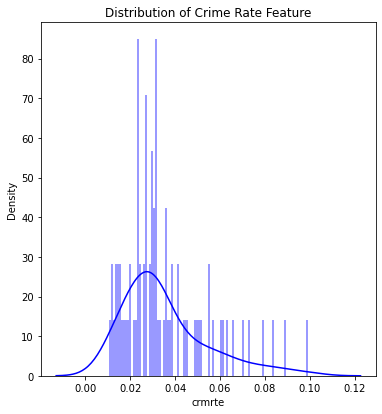

In [27]:
print('Statistics of Crime Rate: \n')
print(crimeData['crmrte'].describe())
plt.figure(figsize=(6,6.5))
plt.title('Distribution of Crime Rate Feature')
sns.distplot(crimeData['crmrte'], color='b', bins=100, hist_kws={'alpha': 0.4})

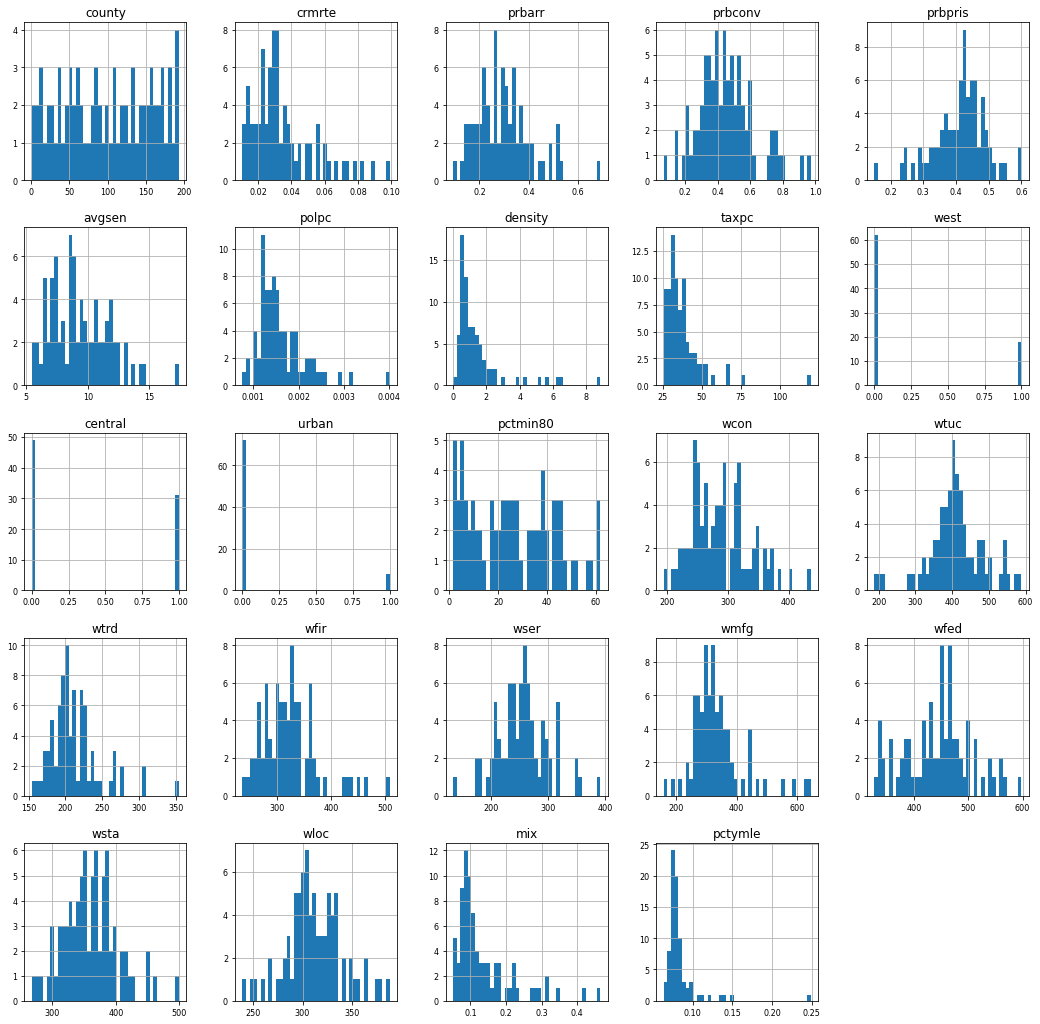

In [29]:
crimeData.hist(figsize=(18,18), bins=40, xlabelsize=8, ylabelsize=8);